In [501]:
# std lib
from getpass import getpass

# 3rd party
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from astropy.utils.data import download_file  #import file from URL
from scipy.stats import binned_statistic_2d
%matplotlib inline
from astropy.table import Table

# Data Lab
from dl import authClient as ac, queryClient as qc, storeClient as sc
from dl.helpers.utils import convert

import astropy
from astropy import units as u
from astropy.coordinates import SkyCoord

print('Done importing')

Done importing


In [453]:
ac.whoAmI()

'yuxinhuang'

In [5]:
RA180924 = (21 + 44/60 + 25/3600)/24*360
RA191001 = (21 + 33/60 + 24/3600)/24*360
RA181112 = (21 + 49/60 + 23/3600)/24*360

DEC180924 = - (40 + 54/60)
DEC191001 = - (54 + 44/60 + 54/3600)
DEC181112 = - (52 + 58/60 + 15/3600)

In [6]:
#FRB191001

In [312]:
# Write query statement (sql) as a string
# NOTE: triple quotes allow us to break the string on multiple lines
query = """
        SELECT coadd_object_id as id, mag_aper_8_r as rmag_aper,
               snr_g, snr_r, snr_z, ra, dec
        FROM des_dr1.main 
        WHERE (ra-(323.35)<1 and ra-(323.35)>-1 and dec-(-54.75)<1 and dec-(-54.75)>-1
                and snr_g>5 and snr_r>5 and snr_z>5 
                and mag_aper_8_r<22 and mag_aper_8_r>0)
        LIMIT 50000"""

# mag_auto_g,r,i,z,y = AB magnitudes in DECam g,r,i,z,y bands
# class_star_g,r,z   = star/extended source classifier (from 0 to 1)
# snr_g,r,z          = computed signal-to-noise ratios (S/N) in g,r,z bands
# ra,dec             = celestial coordinates

print(query)


        SELECT coadd_object_id as id, mag_aper_8_r as rmag_aper,
               snr_g, snr_r, snr_z, ra, dec
        FROM des_dr1.main 
        WHERE (ra-(323.35)<1 and ra-(323.35)>-1 and dec-(-54.75)<1 and dec-(-54.75)>-1
                and snr_g>5 and snr_r>5 and snr_z>5 
                and mag_aper_8_r<22 and mag_aper_8_r>0)
        LIMIT 50000


In [313]:
%%time
# Execute the query synchronously, if short (e.g., LIMIT<=300,000)
# We then convert the returned result, a CSV-formatted string, to a Pandas data frame,
# making sure that any potential 'Infinity' values are converted to NaN.
res = qc.query(sql=query)
df = convert(res,'pandas')

CPU times: user 119 ms, sys: 19 ms, total: 138 ms
Wall time: 3min 51s


In [314]:
print(df[0:5])
len(df)

          id  rmag_aper     snr_g     snr_r    snr_z          ra        dec
0  200615662    21.7626   9.93119   27.7260  27.7610  322.382346 -55.597660
1  200614047    21.5924  15.13450   43.3008  98.0464  322.350189 -55.574071
2  200614150    21.2724  19.29220   54.2764  49.1788  322.352867 -55.575521
3  200613817    20.0624  73.60080   80.9969  42.2072  322.357023 -55.573208
4  200614293    20.2206  69.28220  132.2450  88.7196  322.355804 -55.578002


43293

In [823]:
ra = df['ra'][:]
dec = df['dec'][:]
rmag_aper = df['rmag_aper'][:]

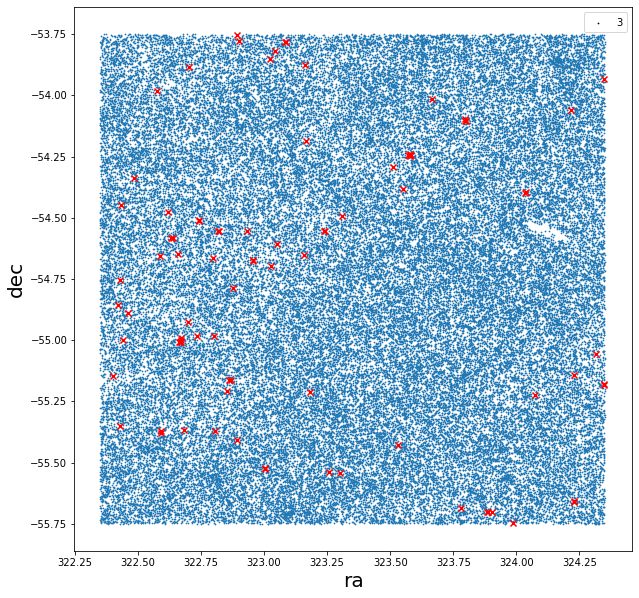

In [747]:
col0 = ra   #ra
col1 = dec   #dec

fig, ax1 = plt.subplots(1, 1, figsize=(10, 10))
im1 = ax1.scatter(col0, col1, marker='o', s = 3, lw=0)
ax1.scatter(bkra,bkdec, marker='x', color='red')
#ax1.annotate('FRB180924', xy = (RA180924,DEC180924),xytext = (RA180924+0.02,DEC180924+0.02))
ax1.set_xlabel('ra',fontsize=20)
ax1.set_ylabel('dec',fontsize=20)
ax1.legend(*im1.legend_elements("sizes", num=5))

#print(max(rmag_aper),min(rmag_aper))

In [316]:
# Write query statement (sql) as a string
# NOTE: triple quotes allow us to break the string on multiple lines
query = """
        SELECT coadd_object_id as id, mag_aper_8_r as rmag_aper,
               snr_g, snr_r, snr_z, ra, dec
        FROM des_dr1.main 
        WHERE (ra-(323.35)<1 and ra-(323.35)>-1 and dec-(-54.75)<1 and dec-(-54.75)>-1
                and snr_g>5 and snr_r>5 and snr_z>5 
                and mag_aper_8_r<24.3 and mag_aper_8_r>=22)
        LIMIT 50000"""

# mag_auto_g,r,i,z,y = AB magnitudes in DECam g,r,i,z,y bands
# class_star_g,r,z   = star/extended source classifier (from 0 to 1)
# snr_g,r,z          = computed signal-to-noise ratios (S/N) in g,r,z bands
# ra,dec             = celestial coordinates

print(query)


        SELECT coadd_object_id as id, mag_aper_8_r as rmag_aper,
               snr_g, snr_r, snr_z, ra, dec
        FROM des_dr1.main 
        WHERE (ra-(323.35)<1 and ra-(323.35)>-1 and dec-(-54.75)<1 and dec-(-54.75)>-1
                and snr_g>5 and snr_r>5 and snr_z>5 
                and mag_aper_8_r<24.3 and mag_aper_8_r>=22)
        LIMIT 50000


In [317]:
%%time
# Execute the query synchronously, if short (e.g., LIMIT<=300,000)
# We then convert the returned result, a CSV-formatted string, to a Pandas data frame,
# making sure that any potential 'Infinity' values are converted to NaN.
res = qc.query(sql=query)
df1 = convert(res,'pandas')

CPU times: user 110 ms, sys: 23 ms, total: 133 ms
Wall time: 3min 18s


In [824]:
print(len(df1))
ra1 = df1['ra'][:]
dec1 = df1['dec'][:]
rmag_aper1 = df1['rmag_aper'][:]

40793


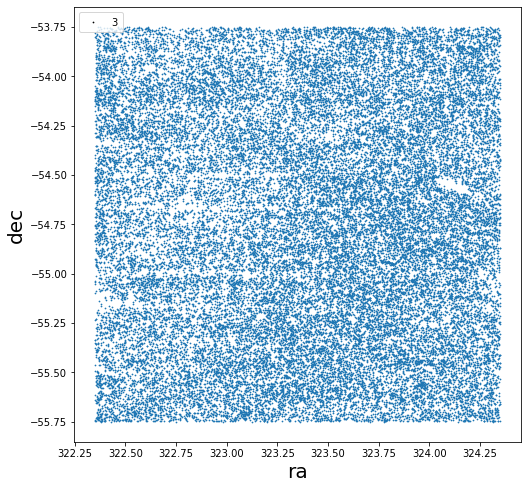

In [27]:
col0 = ra1   #ra
col1 = dec1   #dec

fig, ax1 = plt.subplots(1, 1, figsize=(8, 8))
im1 = ax1.scatter(col0, col1, marker='o', lw=0, s = 3)

ax1.set_xlabel('ra',fontsize=20)
ax1.set_ylabel('dec',fontsize=20)
ax1.legend(*im1.legend_elements("sizes", num=5))


In [825]:
ra = np.hstack((ra,ra1))
dec = np.hstack((dec,dec1))
rmag_aper = np.hstack((rmag_aper,rmag_aper1))

In [826]:
Ng = 400
H, xedges, yedges = np.histogram2d(ra, dec, bins=Ng)
x, y = np.where(H==0)
dx = 0.0
edg = 1-dx
iinmid = np.where((xedges[x]-(323.35)< edg)*(xedges[x]-(323.35)> -edg)*(yedges[y]-(-54.75)< edg)*(yedges[y]-(-54.75)> -edg))
x = x[iinmid]
y = y[iinmid]

In [481]:
#ramax = max(ra)-0.02
#ramin = min(ra)+0.02
#decmax = max(dec)-0.02
#decmin = min(dec)+0.02

#num = np.random.choice(range(len(x)))
num = len(x)
iset = np.array([])

for i in range(num):
    raini = (xedges[x[i]]+xedges[x[i]+1])/2
    decini = (yedges[y[i]]+yedges[y[i]+1])/2

    if(len(np.where((ra>raini-0.01)*(ra<raini+0.01)*(dec>decini-0.01)*(dec<decini+0.01))[0])==0):
        iset = np.append(iset,i)

In [493]:
iset.astype(int)

array([   65,    66,   208,   304,   535,  1022,  2447,  3230,  3465,
        3642,  3718,  3760,  3761,  3808,  3997,  4395,  4605,  5415,
        5626,  6480,  7664,  9845,  9846, 10416, 10417, 11282, 11702,
       11833, 11864, 11865, 11960, 12772, 13092, 13093, 13208, 13334,
       13925, 14004, 14005, 14029, 14185, 14288, 14419, 14539, 15144,
       15195, 15400, 15659, 15932, 15933, 15934, 15935, 16392, 17209,
       17607, 18992, 19476, 19576, 19577, 19671, 21332, 22313, 22511,
       22599, 22714, 23297, 23545, 24943, 25447, 25694, 26246, 26611,
       26853, 26897, 27096, 27368, 27619, 29023, 30238, 30239, 32373,
       32374, 32708, 33240, 33241, 33317, 33567, 33568, 33703, 34535,
       34721, 34894, 35565, 36378, 36511, 36621, 39843, 40198, 40400,
       40988, 42582, 42819, 43051, 43690, 43935, 44558, 46676, 47039,
       56623, 56624, 57427, 57985, 57986, 58506, 58507, 59451, 59688,
       59689, 59690, 59930, 60336, 62668, 62669, 63885, 65121, 69048,
       69941, 69942,

In [433]:
print(x[iset.astype(int)])
print(y[iset.astype(int)])

[686 688 696 696 697 697 698 698 699 699]
[486 485 482 483 482 483 482 483 482 483]


In [482]:
iset.shape

(215,)

In [483]:
np.save(file = 'iset_frb191001.npy', arr = iset)

In [827]:
iset = np.load(file = 'iset_frb191001.npy')

In [437]:
i = int(iset[5])
bra = (xedges[x[i]]+xedges[x[i]+1])/2
bdec = (yedges[y[i]]+yedges[y[i]+1])/2
print(bra, bdec)

324.09374040625005 -54.541230745625


In [204]:
for j in range(len(iset)):
    i = int(iset[j])
    bra = (xedges[x[i]]+xedges[x[i]+1])/2
    bdec = (yedges[y[i]]+yedges[y[i]+1])/2
    print(bra, bdec)

322.35253393749997 -55.167456008749994
322.35253393749997 -55.16245620625
322.35253393749997 -54.03250084125
322.35753381250004 -55.16245620625
322.3625336875 -55.16245620625
322.3725334375 -55.06745995874999
322.40253268749996 -55.14745679875
322.41753231250004 -54.85746825375
322.4225321875 -54.85746825375
322.42753206249995 -55.35244870125
322.42753206249995 -54.75247240125
322.42753206249995 -54.36248780625
322.42753206249995 -54.35748800375
322.42753206249995 -53.93750459375
322.4325319375 -54.447484448750004
322.44253168750004 -54.997462723750004
322.4475315625 -55.23245344125
322.46253118749996 -54.88746706875
322.46753106250003 -55.157456403750004
322.4825306875 -54.33748879375
322.5075300625 -54.67747536375
322.5525289375 -55.312450281249994
322.5525289375 -55.30745047875
322.5625286875 -54.93246529125
322.5625286875 -54.92746548875
322.5775283125 -53.98250281625
322.58752806250004 -54.65747615375
322.5925279375 -55.61743823374999
322.5925279375 -55.37744771375
322.5925279375 

In [200]:
np.where((ra>bra-0.01)*(ra<bra+0.01)*(dec>bdec-0.01)*(dec<bdec+0.01))

(array([], dtype=int64),)

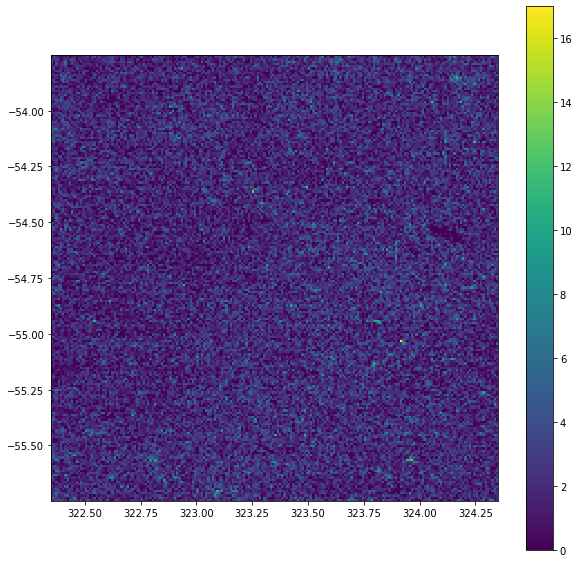

In [91]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(H.T, interpolation='nearest', origin='low', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
plt.colorbar()

In [743]:
sel = np.loadtxt(fname = 'BSfrb191001.txt')
for j in sel:
    i = int(iset[int(j)])
    bra = (xedges[x[i]]+xedges[x[i]+1])/2
    bdec = (yedges[y[i]]+yedges[y[i]+1])/2
    print(bra, bdec)

322.4125324375 -55.282451466249995
322.4325319375 -54.77747141374999
322.43753181249997 -55.26245225625
322.43753181249997 -54.66747575875
322.44253168750004 -54.22249333625
322.4525314375 -54.91246608125
322.4725309375 -54.77747141374999
322.4925304375 -54.30748997875
322.5925279375 -55.69243527125
322.59752781249995 -54.282490966249995
322.6025276875 -54.91246608125
322.6025276875 -54.90746627874999
322.6275270625 -53.93750459375
322.6425266875 -54.18749471875
322.6475265625 -54.11249768125
322.6675260625 -54.267491558749995
322.67252593750004 -54.76247200624999
322.6775258125 -54.66747575875
322.68252568749995 -54.40748602875
322.68252568749995 -54.38748681875
322.68252568749995 -54.382487016249996
322.69252543749997 -54.722473586250004
322.7075250625 -54.37748721375
322.71752481249996 -55.14745679875
322.74252418749995 -54.382487016249996
322.75752381250004 -55.50744257875
322.75752381250004 -55.50244277625
322.8125224375 -55.45244475125
322.8125224375 -53.89250637124999
322.817522

IndexError: index 95572 is out of bounds for axis 0 with size 94338

In [828]:
sel = np.loadtxt(fname = 'BSfrb191001.txt')

In [829]:
dt = np.dtype([('name','U15'),('RA.h','i1'),('RA.m','i1'),('RA.s','f8'),('dec.d','i1'),('dec.m','i1'),('dec.s','f8'),
              ('type','U5'),('prt','i1'),('mag','f4'),('Prog_ID','i1'),('PM_ra','f8'),('PM_dec','f8'),('cmt','U50')])

In [830]:
N=len(sel)
arr1 = np.zeros(N,dtype=dt)

In [831]:
for i in range(N):
    arr1[i]['name'] = '191001BS'+str(i).zfill(3)

In [832]:
sel = np.loadtxt(fname = 'BSfrb191001.txt')
k = 0
for j in sel:
    i = int(iset[int(j)])
    bra = (xedges[x[i]]+xedges[x[i]+1])/2
    bdec = (yedges[y[i]]+yedges[y[i]+1])/2
    c = SkyCoord(bra*u.degree, bdec*u.degree, frame='icrs')
    arr1[k]['RA.h']=np.rint(c.ra.hms[0])
    arr1[k]['RA.m']=np.rint(c.ra.hms[1])
    arr1[k]['RA.s']=c.ra.hms[2]
    arr1[k]['dec.d']=np.rint(c.dec.dms[0])
    arr1[k]['dec.m']=np.rint(abs(c.dec.dms[1]))
    arr1[k]['dec.s']=abs(c.dec.dms[2])
    k = k+1

In [833]:
arr1[:]['type']=np.full(N,'S')
arr1[:]['prt']=np.full(N,9)
arr1[:]['mag']=np.full(N,99)
arr1[:]['Prog_ID']=np.full(N,0)

In [834]:
f = open("FRB191001.txt",'a')
for i in range(N):
    f.write('{:0>11s}   {:0>+3d} {:0>2d} {:0>6.3f}   {:0>+3d} {:0>2d} {:0>6.3f}   {:<5s}{:<4d}{:0>6.3f}   {:<4d}{:<+8.4f}{:<+8.4f}{:<30s}'.format(
    arr1[i]['name'],arr1[i]['RA.h'],arr1[i]['RA.m'],arr1[i]['RA.s'],arr1[i]['dec.d'],arr1[i]['dec.m'],arr1[i]['dec.s'],
    arr1[i]['type'],arr1[i]['prt'],arr1[i]['mag'],arr1[i]['Prog_ID'],arr1[i]['PM_ra'],arr1[i]['PM_dec'],arr1[i]['cmt']))
    f.write('\n') 
f.close()

In [746]:
bkra = np.array([])
bkdec = np.array([])

for j in sel:
    i = int(iset[int(j)])
    bkra = np.append(bkra,(xedges[x[i]]+xedges[x[i]+1])/2)
    bkdec = np.append(bkdec,(yedges[y[i]]+yedges[y[i]+1])/2)

In [ ]:
#FRB180924

In [523]:
# Write query statement (sql) as a string
# NOTE: triple quotes allow us to break the string on multiple lines
query = """
        SELECT coadd_object_id as id, mag_auto_r as rmag, mag_aper_8_r as rmag_aper,
               class_star_g, class_star_r, class_star_z, 
               snr_g, snr_r, snr_z, ra, dec
        FROM des_dr1.main 
        WHERE (ra-(326.104)<1 and ra-(326.104)>-1 and dec-(-40.9)<1 and dec-(-40.9)>-1
                and snr_g>5 and snr_r>5 and snr_z>5 
                and class_star_r<0.5 and class_star_g<0.5 and class_star_z<0.5
                and mag_aper_8_r<22 and mag_aper_8_r>0)
        LIMIT 50000"""

# mag_auto_g,r,i,z,y = AB magnitudes in DECam g,r,i,z,y bands
# class_star_g,r,z   = star/extended source classifier (from 0 to 1)
# snr_g,r,z          = computed signal-to-noise ratios (S/N) in g,r,z bands
# ra,dec             = celestial coordinates

print(query)


        SELECT coadd_object_id as id, mag_auto_r as rmag, mag_aper_8_r as rmag_aper,
               class_star_g, class_star_r, class_star_z, 
               snr_g, snr_r, snr_z, ra, dec
        FROM des_dr1.main 
        WHERE (ra-(326.104)<1 and ra-(326.104)>-1 and dec-(-40.9)<1 and dec-(-40.9)>-1
                and snr_g>5 and snr_r>5 and snr_z>5 
                and class_star_r<0.5 and class_star_g<0.5 and class_star_z<0.5
                and mag_aper_8_r<22 and mag_aper_8_r>0)
        LIMIT 50000


In [524]:
%%time
# Execute the query synchronously, if short (e.g., LIMIT<=300,000)
# We then convert the returned result, a CSV-formatted string, to a Pandas data frame,
# making sure that any potential 'Infinity' values are converted to NaN.
res2 = qc.query(sql=query)
df2 = convert(res2,'pandas')

CPU times: user 124 ms, sys: 18 ms, total: 142 ms
Wall time: 4min 45s


In [748]:
print(len(df2))
ra = df2['ra'][:]
dec = df2['dec'][:]

27513


In [526]:
# Write query statement (sql) as a string
# NOTE: triple quotes allow us to break the string on multiple lines
query = """
        SELECT coadd_object_id as id, mag_auto_r as rmag, mag_aper_8_r as rmag_aper,
               class_star_g, class_star_r, class_star_z, 
               snr_g, snr_r, snr_z, ra, dec
        FROM des_dr1.main 
        WHERE (ra-(326.104)<1 and ra-(326.104)>-1 and dec-(-40.9)<1 and dec-(-40.9)>-1
                and snr_g>5 and snr_r>5 and snr_z>5 
                and class_star_r<0.5 and class_star_g<0.5 and class_star_z<0.5
                and mag_aper_8_r<24.3 and mag_aper_8_r>22)
        LIMIT 50000"""

# mag_auto_g,r,i,z,y = AB magnitudes in DECam g,r,i,z,y bands
# class_star_g,r,z   = star/extended source classifier (from 0 to 1)
# snr_g,r,z          = computed signal-to-noise ratios (S/N) in g,r,z bands
# ra,dec             = celestial coordinates

print(query)


        SELECT coadd_object_id as id, mag_auto_r as rmag, mag_aper_8_r as rmag_aper,
               class_star_g, class_star_r, class_star_z, 
               snr_g, snr_r, snr_z, ra, dec
        FROM des_dr1.main 
        WHERE (ra-(326.104)<1 and ra-(326.104)>-1 and dec-(-40.9)<1 and dec-(-40.9)>-1
                and snr_g>5 and snr_r>5 and snr_z>5 
                and class_star_r<0.5 and class_star_g<0.5 and class_star_z<0.5
                and mag_aper_8_r<24.3 and mag_aper_8_r>22)
        LIMIT 50000


In [527]:
%%time
# Execute the query synchronously, if short (e.g., LIMIT<=300,000)
# We then convert the returned result, a CSV-formatted string, to a Pandas data frame,
# making sure that any potential 'Infinity' values are converted to NaN.
res3 = qc.query(sql=query)
df3 = convert(res3,'pandas')

CPU times: user 121 ms, sys: 24 ms, total: 145 ms
Wall time: 4min 39s


In [749]:
print(len(df3))
ra1 = df3['ra'][:]
dec1 = df3['dec'][:]

28053


In [750]:
ra = np.hstack((ra,ra1))
dec = np.hstack((dec,dec1))

Text(0, 0.5, 'dec')

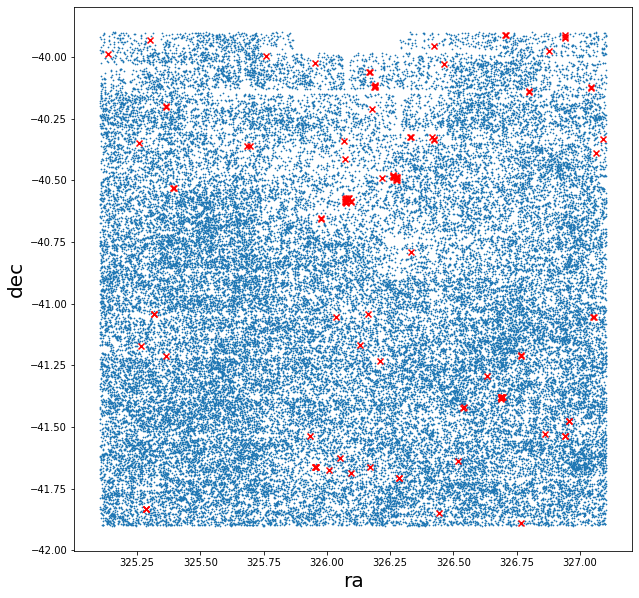

In [815]:
col0 = ra
col1 = dec
fig, ax1 = plt.subplots(1, 1, figsize=(10, 10))
im1 = ax1.scatter(col0, col1, marker='o', s = 3, lw=0)
#ax1.scatter(325.104, -40.07, marker='x', color='red')
ax1.scatter(bkra,bkdec, marker='x', color='red')
ax1.set_xlabel('ra',fontsize=20)
ax1.set_ylabel('dec',fontsize=20)

Text(0, 0.5, 'dec')

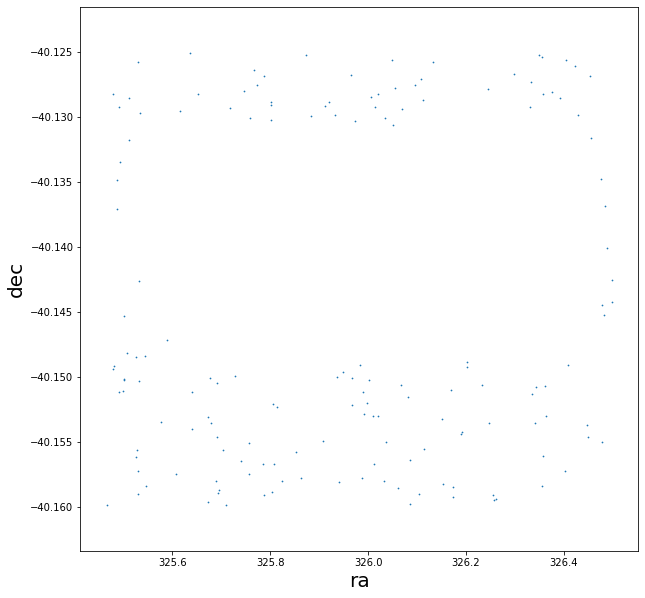

In [643]:
col0 = ra[np.where((ra>325.104)*(ra<325.5)*(dec>-40.16)*(dec<-40.125))]
col1 = dec[np.where((ra>325.104)*(ra<325.5)*(dec>-40.16)*(dec<-40.125))]
fig, ax1 = plt.subplots(1, 1, figsize=(10, 10))
im1 = ax1.scatter(col0, col1, marker='o', s = 3, lw=0)
#ax1.scatter(326.15,-40.1, marker='x', color='red')
ax1.set_xlabel('ra',fontsize=20)
ax1.set_ylabel('dec',fontsize=20)

In [767]:
Ng = 400
H, xedges, yedges = np.histogram2d(ra, dec, bins=Ng)
x, y = np.where(H==0)
dx = 0.01
edg = 1-dx
iinmid = np.where((xedges[x]-(326.104)< edg)*(xedges[x]-(326.104)> -edg)*(yedges[y]-(-40.9)< edg)*(yedges[y]-(-40.9)> -edg))
x = x[iinmid]
y = y[iinmid]

In [769]:
num = len(x)
iset = np.array([])

for i in range(num):
    raini = (xedges[x[i]]+xedges[x[i]+1])/2
    decini = (yedges[y[i]]+yedges[y[i]+1])/2

    if(len(np.where((ra>raini-0.01)*(ra<raini+0.01)*(dec>decini-0.01)*(dec<decini+0.01))[0])==0):
        iset = np.append(iset,i)

In [770]:
iset.shape

(6326,)

In [771]:
isetsel = np.array([])
for j in range(len(iset)):
    i = int(iset[j])
    bra = (xedges[x[i]]+xedges[x[i]+1])/2
    bdec = (yedges[y[i]]+yedges[y[i]+1])/2
    if(bra>325.78 and bra<326.37 and bdec>=-39.96):
        continue
    if(bra>325.68 and bra<326.77 and bdec<-39.96 and bdec>=-39.99):
        continue
    if(bra>326.04 and bra<326.12 and bdec<-39.99 and bdec>=-40.125):
        continue
    if(bra>325.43 and bra<326.52 and bdec<-40.125 and bdec>-40.18):
        continue
    if(bra>325.104 and bra<325.5 and bdec<-40. and bdec>-40.09):
        continue
    isetsel = np.append(isetsel,i)

In [772]:
isetsel.shape

(3930,)

In [790]:
y[isetsel.astype(int)]

array([142, 143, 144, ..., 372, 377, 378])

In [792]:
isetsel1 = isetsel[np.where((yedges[y[isetsel.astype(int)]]+yedges[y[isetsel.astype(int)]+1])/2<-41)]

In [797]:
isetsel2 = np.random.choice(isetsel1,300)

In [798]:
for j in range(len(isetsel2)):
    i = int(isetsel2[j])
    bra = (xedges[x[i]]+xedges[x[i]+1])/2
    bdec = (yedges[y[i]]+yedges[y[i]+1])/2
    print(bra, bdec)

325.9415043 -41.652544711249995
326.19650226 -41.61255533124999
326.78649754 -41.46259515624999
326.87149686 -41.522579226249995
326.08650314 -41.78251019625
326.60649897999997 -41.00271728624999
325.92150446000005 -41.53257657124999
326.20150222 -41.24765223874999
325.12651082 -41.17767082374999
325.89150470000004 -41.79250754124999
325.73150598 -41.04270666625
325.59650706 -41.04270666625
325.3165093 -41.04270666625
325.53650754 -41.127684098749995
326.1915023 -41.227657548749995
325.66150654 -41.03770799374999
326.68649833999996 -41.39761241375
325.28650954 -41.83249692125
325.93150438 -41.53757524375
326.20150222 -41.23765489374999
325.1665105 -41.17767082374999
326.86149694 -41.527577898749996
325.27650962 -41.04770533874999
325.94650426 -41.16767347874999
325.53650754 -41.127684098749995
325.93150438 -41.80250488624999
326.98649594 -41.46259515624999
326.32150126 -41.39761241375
326.00150382000004 -41.80750355875
326.86149694 -41.77751152374999
326.09650306000003 -41.59755931375


In [801]:
j = 9
i = int(isetsel2[j])
bra = (xedges[x[i]]+xedges[x[i]+1])/2
bdec = (yedges[y[i]]+yedges[y[i]+1])/2
print(bra, bdec)

325.89150470000004 -41.79250754124999


In [759]:
np.save(file = 'iset_frb180924.npy', arr = isetsel)

In [760]:
isetsel = np.load(file = 'iset_frb180924.npy')

In [700]:
for j in range(343):
    i = int(isetsel[j])
    bra = (xedges[x[i]]+xedges[x[i]+1])/2
    bdec = (yedges[y[i]]+yedges[y[i]+1])/2
    print(bra, bdec)

325.12151086000006 -41.18266949625
325.12651082 -41.18266949625
325.13651074 -39.98798676874999
325.13651074 -39.98298809625
325.13651074 -39.97798942375
325.20651018 -40.12794959874999
325.20651018 -40.12295092625
325.21151014 -40.12794959874999
325.21151014 -40.12295092625
325.25650978 -40.34789118875
325.30150942 -39.938000043749994
325.30150942 -39.93300137125
325.30650938 -39.938000043749994
325.30650938 -39.93300137125
325.31150934000004 -39.938000043749994
325.31150934000004 -39.93300137125
325.3165093 -39.938000043749994
325.3165093 -39.93300137125
325.32150925999997 -39.938000043749994
325.32150925999997 -39.93300137125
325.32150925999997 -39.92800269874999
325.32150925999997 -39.92300402625
325.32150925999997 -39.91800535375
325.32650922000005 -41.062701356249995
325.32650922000005 -39.938000043749994
325.32650922000005 -39.93300137125
325.32650922000005 -39.92800269874999
325.32650922000005 -39.92300402625
325.32650922000005 -39.91800535375
325.33150918 -39.913006681249996
3

In [800]:
j = 9
i = int(isetsel[j])
bra = (xedges[x[i]]+xedges[x[i]+1])/2
bdec = (yedges[y[i]]+yedges[y[i]+1])/2
print(bra, bdec)

325.89150470000004 -41.79250754124999


In [683]:
raini = 326.07150326
decini = -40.58782746874999
len(np.where((ra>raini-0.02)*(ra<raini+0.02)*(dec>decini-0.02)*(dec<decini+0.02))[0])

0

In [757]:
sel = np.loadtxt(fname = 'BSfrb180924_1.txt')

In [761]:
bkra = np.array([])
bkdec = np.array([])

for j in sel:
    i = int(isetsel[int(j)])
    bkra = np.append(bkra,(xedges[x[i]]+xedges[x[i]+1])/2)
    bkdec = np.append(bkdec,(yedges[y[i]]+yedges[y[i]+1])/2)

In [816]:
np.save(file = 'bkra_frb180924', arr = bkra)
np.save(file = 'bkdec_frb180924', arr = bkdec)

In [ ]:
bkra = np.load(file = 'bkra_frb180924')
bkdec = np.load(file = 'bkdec_frb180924')

In [806]:
bkradec = np.loadtxt(fname = 'bkradec_frb180924.txt')

In [810]:
bkra = np.hstack((bkra, bkradec[:,0]))
bkdec = np.hstack((bkdec, bkradec[:,1]))

In [819]:
dt = np.dtype([('name','U15'),('RA.h','i1'),('RA.m','i1'),('RA.s','f8'),('dec.d','i1'),('dec.m','i1'),('dec.s','f8'),
              ('type','U5'),('prt','i1'),('mag','f4'),('Prog_ID','i1'),('PM_ra','f8'),('PM_dec','f8'),('cmt','U50')])

N=len(bkra)
arr1 = np.zeros(N,dtype=dt)

for i in range(N):
    arr1[i]['name'] = '180924BS'+str(i).zfill(3)

In [820]:
c = SkyCoord(bkra*u.degree, bkdec*u.degree, frame='icrs')
arr1[:]['RA.h']=np.rint(c[:].ra.hms[0])
arr1[:]['RA.m']=np.rint(c[:].ra.hms[1])
arr1[:]['RA.s']=c[:].ra.hms[2]
arr1[:]['dec.d']=np.rint(c[:].dec.dms[0])
arr1[:]['dec.m']=np.rint(abs(c[:].dec.dms[1]))
arr1[:]['dec.s']=abs(c[:].dec.dms[2])
arr1[:]['type']=np.full(N,'S')
arr1[:]['prt']=np.full(N,9)
arr1[:]['mag']=99
arr1[:]['Prog_ID']=np.full(N,0)

In [822]:
f = open("FRB180924.txt",'a')
for i in range(N):
    f.write('{:0>11s}   {:0>+3d} {:0>2d} {:0>6.3f}   {:0>+3d} {:0>2d} {:0>6.3f}   {:<5s}{:<4d}{:0>6.3f}   {:<4d}{:<+8.4f}{:<+8.4f}{:<30s}'.format(
    arr1[i]['name'],arr1[i]['RA.h'],arr1[i]['RA.m'],arr1[i]['RA.s'],arr1[i]['dec.d'],arr1[i]['dec.m'],arr1[i]['dec.s'],
    arr1[i]['type'],arr1[i]['prt'],arr1[i]['mag'],arr1[i]['Prog_ID'],arr1[i]['PM_ra'],arr1[i]['PM_dec'],arr1[i]['cmt']))
    f.write('\n') 
f.close()

In [ ]:
#FRB181112

In [847]:
# Write query statement (sql) as a string
# NOTE: triple quotes allow us to break the string on multiple lines
query = """
        SELECT coadd_object_id as id, mag_auto_r as rmag, mag_aper_8_r as rmag_aper, 
               class_star_g, class_star_r, class_star_z, 
               snr_g, snr_r, snr_z, ra, dec
        FROM des_dr1.main 
        WHERE (ra-(327.346)<1 and ra-(327.346)>-1 and dec-(-52.971)<1 and dec-(-52.971)>-1
                and snr_g>5 and snr_r>5 and snr_z>5 
                and class_star_r<0.5 and class_star_g<0.5 and class_star_z<0.5
                and mag_aper_8_r<20.65 and mag_aper_8_r>0 and mag_auto_r>0 and mag_auto_r<21)
        LIMIT 50000"""

# mag_auto_g,r,i,z,y = AB magnitudes in DECam g,r,i,z,y bands
# class_star_g,r,z   = star/extended source classifier (from 0 to 1)
# snr_g,r,z          = computed signal-to-noise ratios (S/N) in g,r,z bands
# ra,dec             = celestial coordinates

print(query)


        SELECT coadd_object_id as id, mag_auto_r as rmag, mag_aper_8_r as rmag_aper, 
               class_star_g, class_star_r, class_star_z, 
               snr_g, snr_r, snr_z, ra, dec
        FROM des_dr1.main 
        WHERE (ra-(327.346)<1 and ra-(327.346)>-1 and dec-(-52.971)<1 and dec-(-52.971)>-1
                and snr_g>5 and snr_r>5 and snr_z>5 
                and class_star_r<0.5 and class_star_g<0.5 and class_star_z<0.5
                and mag_aper_8_r<20.65 and mag_aper_8_r>0 and mag_auto_r>0 and mag_auto_r<21)
        LIMIT 50000


In [848]:
%%time
# Execute the query synchronously, if short (e.g., LIMIT<=300,000)
# We then convert the returned result, a CSV-formatted string, to a Pandas data frame,
# making sure that any potential 'Infinity' values are converted to NaN.
res4 = qc.query(sql=query)
df4 = convert(res4,'pandas')

CPU times: user 52 ms, sys: 8 ms, total: 60 ms
Wall time: 2min 51s


In [850]:
print(len(df4))
ra = df4['ra'][:]
dec = df4['dec'][:]

5646


In [887]:
query = """
        SELECT coadd_object_id as id, mag_auto_r as rmag, mag_aper_8_r as rmag_aper, 
               class_star_g, class_star_r, class_star_z, 
               snr_g, snr_r, snr_z, ra, dec
        FROM des_dr1.main 
        WHERE (ra-(327.346)<1 and ra-(327.346)>-1 and dec-(-52.971)<1 and dec-(-52.971)>-1
                and snr_g>5 and snr_r>5 and snr_z>5 
                and class_star_r<0.5 and class_star_g<0.5 and class_star_z<0.5
                and mag_aper_8_r<21 and mag_aper_8_r>20.65 and mag_auto_r>0 and mag_auto_r<26)
        LIMIT 50000"""

# mag_auto_g,r,i,z,y = AB magnitudes in DECam g,r,i,z,y bands
# class_star_g,r,z   = star/extended source classifier (from 0 to 1)
# snr_g,r,z          = computed signal-to-noise ratios (S/N) in g,r,z bands
# ra,dec             = celestial coordinates

print(query)


        SELECT coadd_object_id as id, mag_auto_r as rmag, mag_aper_8_r as rmag_aper, 
               class_star_g, class_star_r, class_star_z, 
               snr_g, snr_r, snr_z, ra, dec
        FROM des_dr1.main 
        WHERE (ra-(327.346)<1 and ra-(327.346)>-1 and dec-(-52.971)<1 and dec-(-52.971)>-1
                and snr_g>5 and snr_r>5 and snr_z>5 
                and class_star_r<0.5 and class_star_g<0.5 and class_star_z<0.5
                and mag_aper_8_r<21 and mag_aper_8_r>20.65 and mag_auto_r>0 and mag_auto_r<26)
        LIMIT 50000


In [888]:
%%time
# Execute the query synchronously, if short (e.g., LIMIT<=300,000)
# We then convert the returned result, a CSV-formatted string, to a Pandas data frame,
# making sure that any potential 'Infinity' values are converted to NaN.
res5 = qc.query(sql=query)
df5 = convert(res5,'pandas')

CPU times: user 51 ms, sys: 3 ms, total: 54 ms
Wall time: 4min 43s


In [889]:
print(len(df5))
ra1 = df5['ra'][:]
dec1 = df5['dec'][:]

2500


In [884]:
query = """
        SELECT coadd_object_id as id, mag_auto_r as rmag, mag_aper_8_r as rmag_aper, 
               class_star_g, class_star_r, class_star_z, 
               snr_g, snr_r, snr_z, ra, dec
        FROM des_dr1.main 
        WHERE (ra-(327.346)<1 and ra-(327.346)>-1 and dec-(-52.971)<1 and dec-(-52.971)>-1
                and snr_g>5 and snr_r>5 and snr_z>5 
                and class_star_r<0.5 and class_star_g<0.5 and class_star_z<0.5
                and mag_aper_8_r<24.3 and mag_aper_8_r>21 and mag_auto_r>15 and mag_auto_r<26)
        LIMIT 50000"""

# mag_auto_g,r,i,z,y = AB magnitudes in DECam g,r,i,z,y bands
# class_star_g,r,z   = star/extended source classifier (from 0 to 1)
# snr_g,r,z          = computed signal-to-noise ratios (S/N) in g,r,z bands
# ra,dec             = celestial coordinates

print(query)


        SELECT coadd_object_id as id, mag_auto_r as rmag, mag_aper_8_r as rmag_aper, 
               class_star_g, class_star_r, class_star_z, 
               snr_g, snr_r, snr_z, ra, dec
        FROM des_dr1.main 
        WHERE (ra-(327.346)<1 and ra-(327.346)>-1 and dec-(-52.971)<1 and dec-(-52.971)>-1
                and snr_g>5 and snr_r>5 and snr_z>5 
                and class_star_r<0.5 and class_star_g<0.5 and class_star_z<0.5
                and mag_aper_8_r<24.3 and mag_aper_8_r>21 and mag_auto_r>15 and mag_auto_r<26)
        LIMIT 50000


In [885]:
%%time
# Execute the query synchronously, if short (e.g., LIMIT<=300,000)
# We then convert the returned result, a CSV-formatted string, to a Pandas data frame,
# making sure that any potential 'Infinity' values are converted to NaN.
res6 = qc.query(sql=query)
df6 = convert(res6,'pandas')

CPU times: user 139 ms, sys: 33 ms, total: 172 ms
Wall time: 4min 44s


In [886]:
print(len(df6))
ra2 = df6['ra'][:]
dec2 = df6['dec'][:]

36073


In [891]:
ra = np.hstack((ra,ra1))
dec = np.hstack((dec,dec1))

In [892]:
ra = np.hstack((ra,ra2))
dec = np.hstack((dec,dec2))

Text(0, 0.5, 'dec')

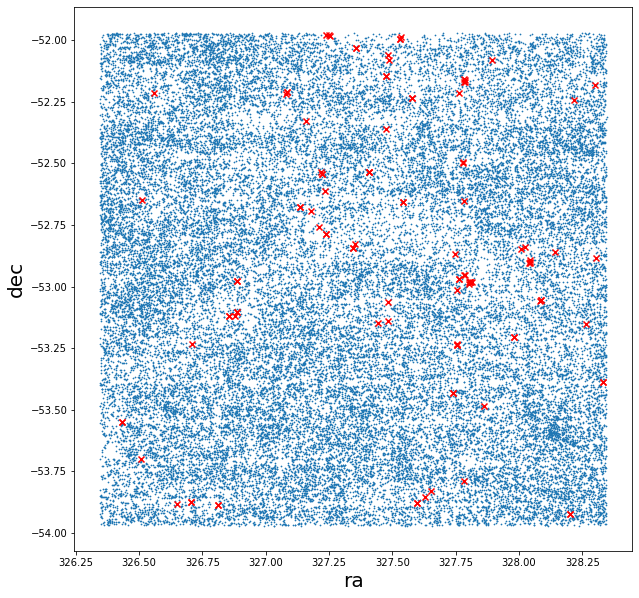

In [922]:
col0 = ra
col1 = dec
fig, ax1 = plt.subplots(1, 1, figsize=(10, 10))
im1 = ax1.scatter(col0, col1, marker='o', s = 3, lw=0)
#ax1.scatter(325.104, -40.07, marker='x', color='red')
ax1.scatter(bkradec[:,0],bkradec[:,1], marker='x', color='red')
ax1.set_xlabel('ra',fontsize=20)
ax1.set_ylabel('dec',fontsize=20)

In [915]:
Ng = 400
H, xedges, yedges = np.histogram2d(ra, dec, bins=Ng)
x, y = np.where(H==0)
dx = 0.015
edg = 1-dx
iinmid = np.where((xedges[x]-(327.346)< edg)*(xedges[x]-(327.346)> -edg)*(yedges[y]-(-52.971)< edg)*(yedges[y]-(-52.971)> -edg))
x = x[iinmid]
y = y[iinmid]

In [916]:
num = len(x)
iset = np.array([])

for i in range(num):
    raini = (xedges[x[i]]+xedges[x[i]+1])/2
    decini = (yedges[y[i]]+yedges[y[i]+1])/2

    if(len(np.where((ra>raini-0.015)*(ra<raini+0.015)*(dec>decini-0.015)*(dec<decini+0.015))[0])==0):
        iset = np.append(iset,i)

In [917]:
iset.shape

(258,)

In [898]:
j = 0
i = int(iset[j])
bra = (xedges[x[i]]+xedges[x[i]+1])/2
bdec = (yedges[y[i]]+yedges[y[i]+1])/2
print(bra, bdec)

326.38852308875 -53.673466643750004


In [903]:
isetsel1 = np.random.choice(iset,300)

In [905]:
isetsel2 = np.random.choice(iset,300)

In [913]:
isetsel2 = np.setdiff1d(isetsel1, isetsel2)

In [918]:
for j in range(len(iset)):
    i = int(iset[j])
    bra = (xedges[x[i]]+xedges[x[i]+1])/2
    bdec = (yedges[y[i]]+yedges[y[i]+1])/2
    print(bra, bdec)

326.36352480125 -53.80346111875001
326.36352480125 -53.79846133125001
326.37352411625 -53.673466643750004
326.37852377375 -53.673466643750004
326.38352343125 -53.67846643125
326.38352343125 -53.673466643750004
326.38352343125 -53.66846685625001
326.38352343125 -53.66346706875001
326.38352343125 -53.658467281250005
326.38352343125 -53.65346749375001
326.38352343125 -52.233527843750004
326.38852308875 -53.67846643125
326.38852308875 -53.673466643750004
326.38852308875 -53.66846685625001
326.38852308875 -53.66346706875001
326.38852308875 -53.658467281250005
326.38852308875 -53.65346749375001
326.38852308875 -53.64846770625
326.39352274625 -53.683466218750006
326.39352274625 -53.67846643125
326.39352274625 -53.673466643750004
326.39352274625 -53.66846685625001
326.39352274625 -53.66346706875001
326.39852240375 -53.548471956250005
326.46351795124997 -53.823460268750004
326.56351110125 -52.70350786875001
326.56351110125 -52.698508081250004
326.56351110125 -52.69350829375001
326.56851075875 -

In [921]:
bkradec = np.loadtxt(fname = 'bkradec_frb181112.txt')

In [923]:
dt = np.dtype([('name','U15'),('RA.h','i1'),('RA.m','i1'),('RA.s','f8'),('dec.d','i1'),('dec.m','i1'),('dec.s','f8'),
              ('type','U5'),('prt','i1'),('mag','f4'),('Prog_ID','i1'),('PM_ra','f8'),('PM_dec','f8'),('cmt','U50')])

N=len(bkradec[:,0])
arr1 = np.zeros(N,dtype=dt)

for i in range(N):
    arr1[i]['name'] = '181112BS'+str(i).zfill(3)

In [924]:
c = SkyCoord(bkradec[:,0]*u.degree, bkradec[:,1]*u.degree, frame='icrs')
arr1[:]['RA.h']=np.rint(c[:].ra.hms[0])
arr1[:]['RA.m']=np.rint(c[:].ra.hms[1])
arr1[:]['RA.s']=c[:].ra.hms[2]
arr1[:]['dec.d']=np.rint(c[:].dec.dms[0])
arr1[:]['dec.m']=np.rint(abs(c[:].dec.dms[1]))
arr1[:]['dec.s']=abs(c[:].dec.dms[2])
arr1[:]['type']=np.full(N,'S')
arr1[:]['prt']=np.full(N,9)
arr1[:]['mag']=99
arr1[:]['Prog_ID']=np.full(N,2)

In [930]:
f = open("FRB181112_p1.txt",'a')
for i in range(N):
    f.write('{:0>11s}   {:0>+3d} {:0>2d} {:0>6.3f}   {:0>+3d} {:0>2d} {:0>6.3f}   {:<5s}{:<4d}{:0>6.3f}   {:<4d}{:<+8.4f}{:<+8.4f}{:<30s}'.format(
    arr1[i]['name'],arr1[i]['RA.h'],arr1[i]['RA.m'],arr1[i]['RA.s'],arr1[i]['dec.d'],arr1[i]['dec.m'],arr1[i]['dec.s'],
    arr1[i]['type'],arr1[i]['prt'],arr1[i]['mag'],arr1[i]['Prog_ID'],arr1[i]['PM_ra'],arr1[i]['PM_dec'],arr1[i]['cmt']))
    f.write('\n') 
f.close()